In [6]:
import time

import matplotlib.pyplot as plt
import numpy as np

# Part 1


In [7]:
class Object:
    def __init__(self, weight, value):
        self.weight = weight
        self.value = value

    def __str__(self) -> str:
        return f"{self.weight=}, {self.value=}"


class Bag:
    def __init__(self, max_weight):
        self.max_weight = max_weight
        self.total_weight = 0
        self.total_value = 0
        self.objects = []

    def __str__(self) -> str:
        objects_str = ", ".join([str(obj) for obj in self.objects])

        return (
            f"{self.max_weight=}, {self.total_weight=}, "
            f"{self.total_value=}, objects=[{objects_str}])"
        )
        
    def copy(self):
        new_bag = Bag(self.max_weight)
        new_bag.total_weight = self.total_weight
        new_bag.total_value = self.total_value
        new_bag.objects = self.objects.copy()
        return new_bag

    def add_object(self, obj: Object) -> None:
        if self.is_addable(obj):
            self.objects.append(obj)
            self.total_weight += obj.weight
            self.total_value += obj.value

    def is_addable(self, obj: Object) -> bool:
        remaining_weight = self.max_weight - self.total_weight
        return obj.weight <= remaining_weight

    def reset(self) -> None:
        self.objects = []
        self.total_weight = 0
        self.total_value = 0

In [8]:
bag = Bag(max_weight=100)
obj_list = [
    Object(weight=np.random.randint(1, 200), value=np.random.randint(1, 100))
    for _ in range(20)
]

In [9]:
def rank_objects(obj_list: list[Object]) -> list[Object]:
    res = []
    for i in range(len(obj_list)):
        res.append((obj_list[i].value / obj_list[i].weight, i, obj_list[i]))

    return sorted(res, reverse=True)

In [10]:
def glouton(bag: Bag, obj_list: list[Object]) -> None:
    ranked_obj = rank_objects(obj_list)
    for _, _, obj in ranked_obj:
        bag.add_object(obj)

        if bag.total_weight >= bag.max_weight:
            return

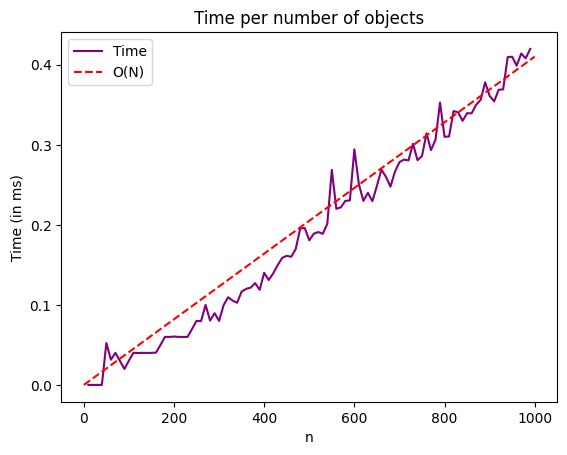

In [14]:
max_object_weight = 10
test_count = 100
n_max = 1000

times = []
ns = list(range(10, n_max, 10))

for n in ns:
    bag = Bag(max_weight=max_object_weight * n)
    obj_list = [
        Object(
            weight=np.random.randint(1, max_object_weight),
            value=np.random.randint(1, 100),
        )
        for _ in range(n)
    ]

    start = time.time()

    for _ in range(test_count):
        glouton(bag, obj_list)

    times.append((time.time() - start) * 1000 / test_count)


plt.plot(
    ns,
    times,
    color="purple",
)
# O(N) line for reference
# line from 0,0 to n_max,max(times)
plt.plot(
    [0, n_max],
    [0, np.mean(times[-5:]) * n_max / n_max],
    color="red",
    linestyle="--",
)
plt.xlabel("n")
plt.ylabel("Time (in ms)")
plt.title("Time per number of objects")
plt.legend(["Time", "O(N)"])
plt.show()

# Part 2


In [15]:
# TODO find a better function name
def make_tree(bag: Bag, objects: list[Object], verbose=False):
    n = len(objects)
    best_solution = 0
    stack = [(0, 0, 0)]  # (level, current_weight, current_value)

    max_weight = bag.max_weight

    node_count = 1
    leaf_count = 0

    while stack:
        node_count += 1
        level, current_weight, current_value = stack.pop()

        # Out of capacity
        if current_weight > max_weight:
            continue

        best_solution = max(best_solution, current_value)

        # Leaf reached
        if level == n:
            leaf_count += 1
            continue

        object = objects[level]

        stack.append(
            (level + 1, current_weight, current_value)
        )  # Right node: don't include next object

        stack.append(
            (level + 1, current_weight + object.weight, current_value + object.value)
        )  # Left node: include next object

    if verbose:
        print(f"{node_count=}, {leaf_count=}")
    return best_solution, node_count, leaf_count

In [19]:
objects = [
    Object(weight=1, value=2),
    Object(weight=2, value=3),
    Object(weight=3, value=4),
    Object(weight=4, value=5),
]
bag = Bag(max_weight=5)

start = time.time()
best_tree, _, _ = make_tree(bag, objects)
print(f"Tree Time={time.time() - start}")
print(f"{best_tree=}")

print("----")
time.time()
glouton(bag, objects)
print(f"Glouton Time={time.time() - start}")
print(f"glouton_solution={bag.total_value}")

Tree Time=0.0
best_tree=7
----
Glouton Time=0.0
glouton_solution=5


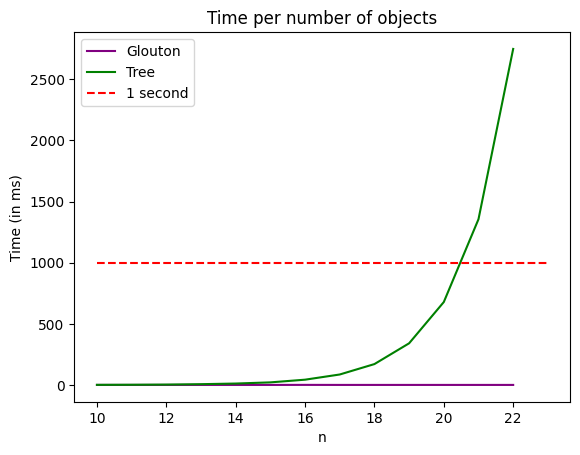

In [17]:
max_object_weight = 10
test_count = 3
n_min = 10
n_max = 23

glouton_times = []
tree_times = []
ns = list(range(n_min, n_max, 1))

for n in ns:
    bag = Bag(max_weight=max_object_weight * n)
    obj_list = [
        Object(
            weight=np.random.randint(1, max_object_weight),
            value=np.random.randint(1, 100),
        )
        for _ in range(n)
    ]

    start = time.time()

    for _ in range(test_count):
        glouton(bag, obj_list)

    glouton_times.append((time.time() - start) * 1000 / test_count)

    start = time.time()

    for _ in range(test_count):
        make_tree(bag, obj_list)

    tree_times.append((time.time() - start) * 1000 / test_count)

plt.plot(
    ns,
    glouton_times,
    color="purple",
)
plt.plot(
    ns,
    tree_times,
    color="green",
)

# Line at 1s for reference (1000 ms)
plt.plot(
    [n_min, n_max],
    [1000, 1000],
    color="red",
    linestyle="--",
)
plt.xlabel("n")
plt.ylabel("Time (in ms)")
plt.title("Time per number of objects")
plt.legend(["Glouton", "Tree", "1 second"])
plt.show()

Tree is much slower but provides better solutions in edge cases.


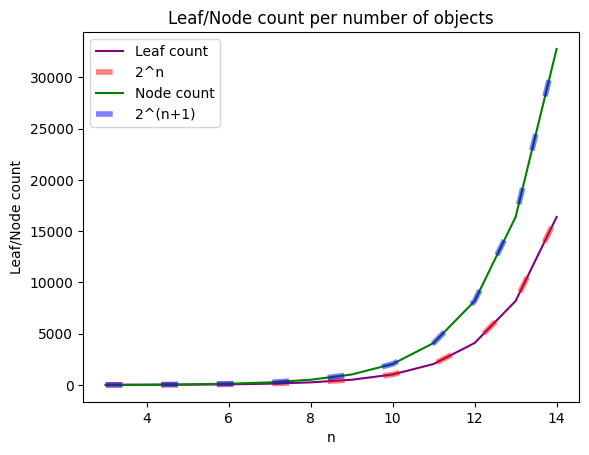

In [20]:
max_object_weight = 10
n_min = 3
n_max = 15
ns = list(range(n_min, n_max, 1))
leaf_counts = []
node_counts = []

for n in ns:
    bag = Bag(max_weight=max_object_weight * n)
    obj_list = [
        Object(
            weight=np.random.randint(1, max_object_weight),
            value=np.random.randint(1, 100),
        )
        for _ in range(n)
    ]

    _, node_count, leaf_count = make_tree(bag, obj_list)
    node_counts.append(node_count)
    leaf_counts.append(leaf_count)


plt.plot(
    ns,
    leaf_counts,
    color="purple",
)
plt.plot(
    ns,
    [2**n for n in ns],
    color=(1, 0, 0, 0.5),
    linestyle="--",
    linewidth=4,
    dashes=(3, 7),
)

plt.plot(
    ns,
    node_counts,
    color="green",
)
plt.plot(
    ns,
    [2 ** (n + 1) for n in ns],
    color=(0, 0, 1, 0.5),
    linestyle="--",
    linewidth=4,
    dashes=(3, 7),
)

plt.xlabel("n")
plt.ylabel("Leaf/Node count")
plt.title("Leaf/Node count per number of objects")
plt.legend(["Leaf count", "2^n", "Node count", "2^(n+1)"])
plt.show()

### Algorithm with bounds


In [166]:
def bound(bag: Bag, objects: list[Object], level):
    newbag = bag.copy()
    glouton(newbag, objects[level:])
    return newbag.total_value

In [167]:
def branch_and_bound(bag: Bag, objects: list[Object], verbose=False):
    n = len(objects)
    #best_solution = bound(bag, objects, 0)
    #best_solution = rank_objects(objects)[-1][0] * bag.max_weight
    best_solution = 0
    stack = [(0, 0, 0)]  # (level, current_weight, current_value)

    node_count = 1
    leaf_count = 0

    while stack:
        node_count += 1
        level, current_weight, current_value = stack.pop()

        if current_weight > bag.max_weight:
            continue
        

        upper = current_value + bound(bag, objects, level)
        if upper <= best_solution:
            continue
        
        best_solution = max(best_solution, current_value)
        #print(f"new best: {best_solution}")

        if level == n:
            leaf_count += 1
            continue

        obj = objects[level]
        stack.append(
            (level + 1, current_weight, current_value)
        )  # Don't take next object
        stack.append(
            (level + 1, current_weight + obj.weight, current_value + obj.value)
        )  # Take next object

    if verbose:
        print(f"{node_count=}, {leaf_count=}")

    return best_solution, node_count, leaf_count

In [168]:
n = 20
obj_list = [
    Object(weight=i+1, value=i+2) for i in range(n)
]
bag = Bag(max_weight=n)

In [169]:
n = 20
max_object_weight = 10
bag = Bag(max_weight=max_object_weight * n)
obj_list = [
    Object(
        weight=np.random.randint(1, max_object_weight),
        value=np.random.randint(1, 100),
    )
    for _ in range(n)
]

In [170]:
start = time.time()
best_tree, _, _ = make_tree(bag, obj_list, verbose=True)
print(str(round(1000 * (time.time() - start), 2)) + "ms")
print(best_tree)

node_count=2097152, leaf_count=1048576
757.66ms
933


In [171]:
bag.reset()
start = time.time()
best_branch_and_bound, _, _ = branch_and_bound(bag, obj_list, verbose=True)
print(str(round(1000 * (time.time() - start), 2)) + "ms")
print(best_branch_and_bound)

node_count=42, leaf_count=1
1.0ms
933


In [172]:
bag.reset()
start = time.time()
glouton(bag, obj_list)
print(str(round(1000 * (time.time() - start), 2)) + "ms")
print(bag.total_value)

0.0ms
933


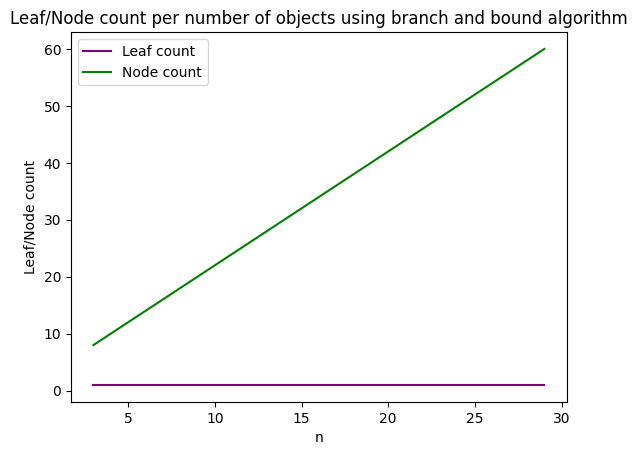

In [173]:
max_object_weight = 10
n_min = 3
n_max = 30
ns = list(range(n_min, n_max, 1))
leaf_counts = []
node_counts = []

for n in ns:
    bag = Bag(max_weight=max_object_weight * n)
    obj_list = [
        Object(
            weight=np.random.randint(1, max_object_weight),
            value=np.random.randint(1, 100),
        )
        for _ in range(n)
    ]

    _, node_count, leaf_count = branch_and_bound(bag, obj_list)
    node_counts.append(node_count)
    leaf_counts.append(leaf_count)


plt.plot(
    ns,
    leaf_counts,
    color="purple",
)

plt.plot(
    ns,
    node_counts,
    color="green",
)

plt.xlabel("n")
plt.ylabel("Leaf/Node count")
plt.title("Leaf/Node count per number of objects using branch and bound algorithm")
plt.legend(["Leaf count", "Node count"])
plt.show()

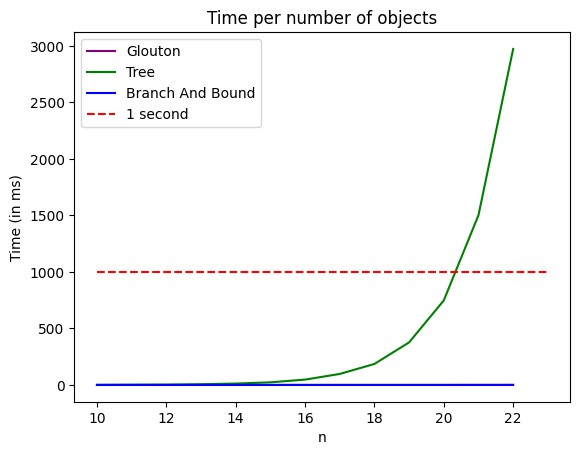

In [174]:
max_object_weight = 10
test_count = 3
n_min = 10
n_max = 23

glouton_times = []
tree_times = []
branch_times = []
ns = list(range(n_min, n_max, 1))

for n in ns:
    bag = Bag(max_weight=max_object_weight * n)
    obj_list = [
        Object(
            weight=np.random.randint(1, max_object_weight),
            value=np.random.randint(1, 100),
        )
        for _ in range(n)
    ]

    start = time.time()

    for _ in range(test_count):
        glouton(bag, obj_list)

    glouton_times.append((time.time() - start) * 1000 / test_count)

    start = time.time()

    for _ in range(test_count):
        make_tree(bag, obj_list)

    tree_times.append((time.time() - start) * 1000 / test_count)
    
    bag.reset()
    start = time.time()
    
    for _ in range(test_count):
        branch_and_bound(bag, obj_list)
    
    branch_times.append((time.time() - start) * 1000 / test_count)

plt.plot(
    ns,
    glouton_times,
    color="purple",
)
plt.plot(
    ns,
    tree_times,
    color="green",
)
plt.plot(
    ns,
    branch_times,
    color="blue",
)
# Line at 1s for reference (1000 ms)
plt.plot(
    [n_min, n_max],
    [1000, 1000],
    color="red",
    linestyle="--",
)
plt.xlabel("n")
plt.ylabel("Time (in ms)")
plt.title("Time per number of objects")
plt.legend(["Glouton", "Tree", "Branch And Bound", "1 second"])
plt.show()

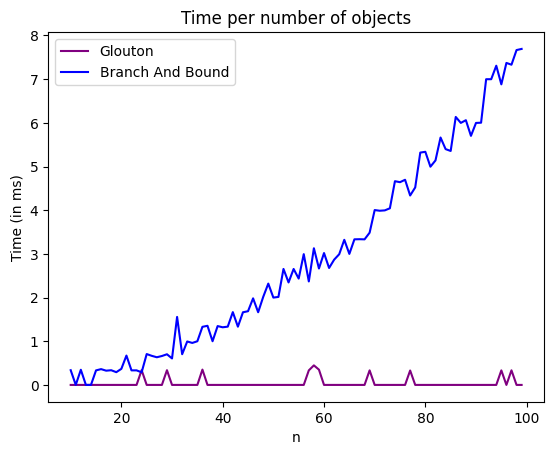

In [175]:
max_object_weight = 10
test_count = 3
n_min = 10
n_max = 100

glouton_times = []
branch_times = []
ns = list(range(n_min, n_max, 1))

for n in ns:
    bag = Bag(max_weight=max_object_weight * n)
    obj_list = [
        Object(
            weight=np.random.randint(1, max_object_weight),
            value=np.random.randint(1, 100),
        )
        for _ in range(n)
    ]

    start = time.time()

    for _ in range(test_count):
        glouton(bag, obj_list)

    glouton_times.append((time.time() - start) * 1000 / test_count)

    start = time.time()
    
    bag.reset()
    start = time.time()
    
    for _ in range(test_count):
        branch_and_bound(bag, obj_list)
    
    branch_times.append((time.time() - start) * 1000 / test_count)

plt.plot(
    ns,
    glouton_times,
    color="purple",
)
plt.plot(
    ns,
    branch_times,
    color="blue",
)
plt.xlabel("n")
plt.ylabel("Time (in ms)")
plt.title("Time per number of objects")
plt.legend(["Glouton", "Branch And Bound"])
plt.show()

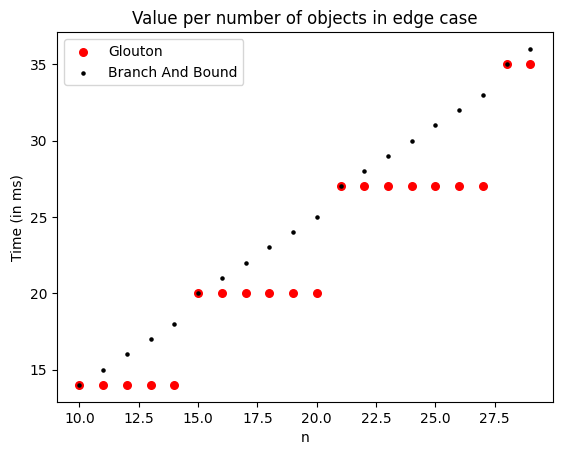

In [200]:
max_object_weight = 10
test_count = 1
n_min = 10
n_max = 30

glouton_values = []
branch_values = []
ns = list(range(n_min, n_max, 1))

for n in ns:
    obj_list = [
        Object(weight=i+1, value=i+2) for i in range(n)
    ]
    bag = Bag(max_weight=n)

    for _ in range(test_count):
        glouton(bag, obj_list)

    glouton_values.append(bag.total_value)
    
    bag.reset()
    
    for _ in range(test_count):
        best_branch, _, _ = branch_and_bound(bag, obj_list)
    
    branch_values.append(best_branch)

plt.scatter(
    ns,
    glouton_values,
    color="red",
    s=30,
)
plt.scatter(
    ns,
    branch_values,
    color="black",
    s=5,
)
plt.xlabel("n")
plt.ylabel("Time (in ms)")
plt.title("Value per number of objects in edge case")
plt.legend(["Glouton", "Branch And Bound", "1 second"])
plt.show()

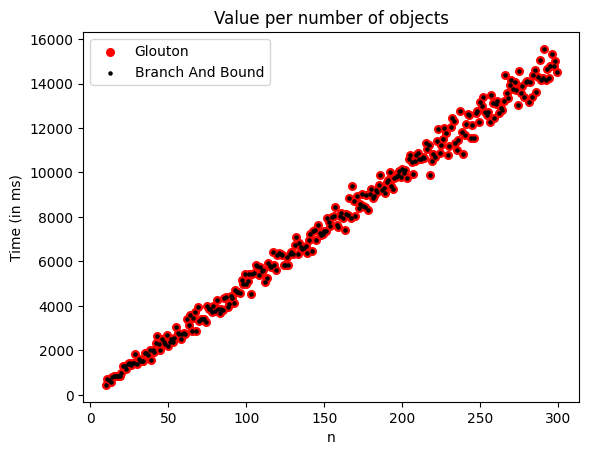

In [199]:
max_object_weight = 10
test_count = 1
n_min = 10
n_max = 300

glouton_values = []
branch_values = []
ns = list(range(n_min, n_max, 1))

for n in ns:
    bag = Bag(max_weight=max_object_weight * n)
    obj_list = [
        Object(
            weight=np.random.randint(1, max_object_weight),
            value=np.random.randint(1, 100),
        )
        for _ in range(n)
    ]

    for _ in range(test_count):
        glouton(bag, obj_list)

    glouton_values.append(bag.total_value)
    
    bag.reset()
    
    for _ in range(test_count):
        best_branch, _, _ = branch_and_bound(bag, obj_list)
    
    branch_values.append(best_branch)

plt.scatter(
    ns,
    glouton_values,
    color="red",
    s=30,
)
plt.scatter(
    ns,
    branch_values,
    color="black",
    s=5,
)
plt.xlabel("n")
plt.ylabel("Time (in ms)")
plt.title("Value per number of objects")
plt.legend(["Glouton", "Branch And Bound", "1 second"])
plt.show()